## # EDA -  Algerian Forest Fires Dataset

### 1. Understanding The Given Task
* Solve in ipynb:
1. Import the dataset from
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA (analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps

### 2. Data Collection & Understanding

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.

* As per the Task given i choose regression problem to predict fire weather index

### 3. Data Exploration

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


##### Below are tasks to be performed in EDA:

1. Importing Libraries
2. Data Cleaning for EDA Report
3. Exploratory Data Analysis (EDA) on all Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header = 1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.shape

(246, 14)

### # Data checks to perform in EDA

#### Step-01: Check Datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


#### Insights/Observations:
- The reason for the numerical features being shown as object is due to the strings in any row.
- The data has to be cleaned because there are some null values in it.

#### Step-02: Check Missing Values

In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### Insights/Obseravtions:
- The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. 
- So, we need to clean the data and specify a new column which tells about the region of the forest.

In [8]:
df.loc[:122, "Region"] = 1
df.loc[122:, "Region"] = 2

In [9]:
df[["Region"]] = df[["Region"]].astype(int)

In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [11]:
df = df.dropna().reset_index(drop = True)
df.shape

(244, 15)

In [12]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


#### Insights/Obseravtions: 
- Inorder to change the datatype of the numerical features, first of all we need to find that row which has strings in it. 
- Here we found a row which has strings in it and now we have to delete that particular row.

In [13]:
df = df.drop(122).reset_index(drop = True)
df.shape

(243, 15)

In [14]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2


In [15]:
df.iloc[[167]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire,2


#### Step-03: Check Duplicates

In [16]:
df.duplicated().sum()

0

#### Insights/Obseravtions: 
- There are no duplicates in the given dataset.

In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

#### Insights/Obseravtions:
- Some of the columns are misspaced, we need to correct them.

In [18]:
df.columns = df.columns.str.strip()

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
df[["day", "month", "year", "Temperature", "RH", "Ws"]] = df[["day", "month", "year", "Temperature", "RH", "Ws"]].astype(int)

In [21]:
objects = [feature for feature in df.columns if df[feature].dtype == "object"]
for i in objects:
    if i != "Classes" :
        df[i] = df[i].astype(float) 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


#### Insights/Obseravtions:
- 7 columns -> int64 (day, month, year, Temperature, RH, Ws, Region)
- 7 columns -> float64 (Rain, FFMC, DMC, DC, ISI, BUI, FWI)
- 1 column -> object (Classes)

#### Step-04: Check the no. of unique values of each column

In [23]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          8
Region           2
dtype: int64

#### Insights/Observations: 
- There are only 2 categories in the classes feature but due to misspacing in some rows, they are identified as different categories.

#### Step-05: Check the statistics of dataset

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


#### Insights/Observations:
- Temperature:
    - Minimum: 22.00
    - Mean: 32.15
    - Median: 32.00
    - Maximum: 42.00

#### Step-06: Check for various categories present in different categorical column

In [25]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

#### Insights/Observations:
- There are only 2 categories in this feature but due to misspacing in some rows, they are identified as different categories. 

In [26]:
df["Classes"] = df["Classes"].str.strip()

In [27]:
df["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [28]:
df["Region"].value_counts()

1    122
2    121
Name: Region, dtype: int64

#### Region-01: Bejeia Region

In [29]:
df.iloc[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


#### Region-02: Sidi-Bel Abbes Region

In [30]:
df.iloc[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


### # EDA - Data Visualization

In [31]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [32]:
df.to_csv("Algerian_forest_fires_dataset_CLEANED.csv")

In [33]:
#Droping Year features
df.drop(["day", "month", "year"], axis = 1, inplace = True)

In [34]:
# Encoding Not fire as 0 and Fire as 1
df["Classes"] = np.where(df["Classes"] == "not fire", 0, 1)

In [35]:
# Check Counts
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [36]:
# Check DataFrame
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


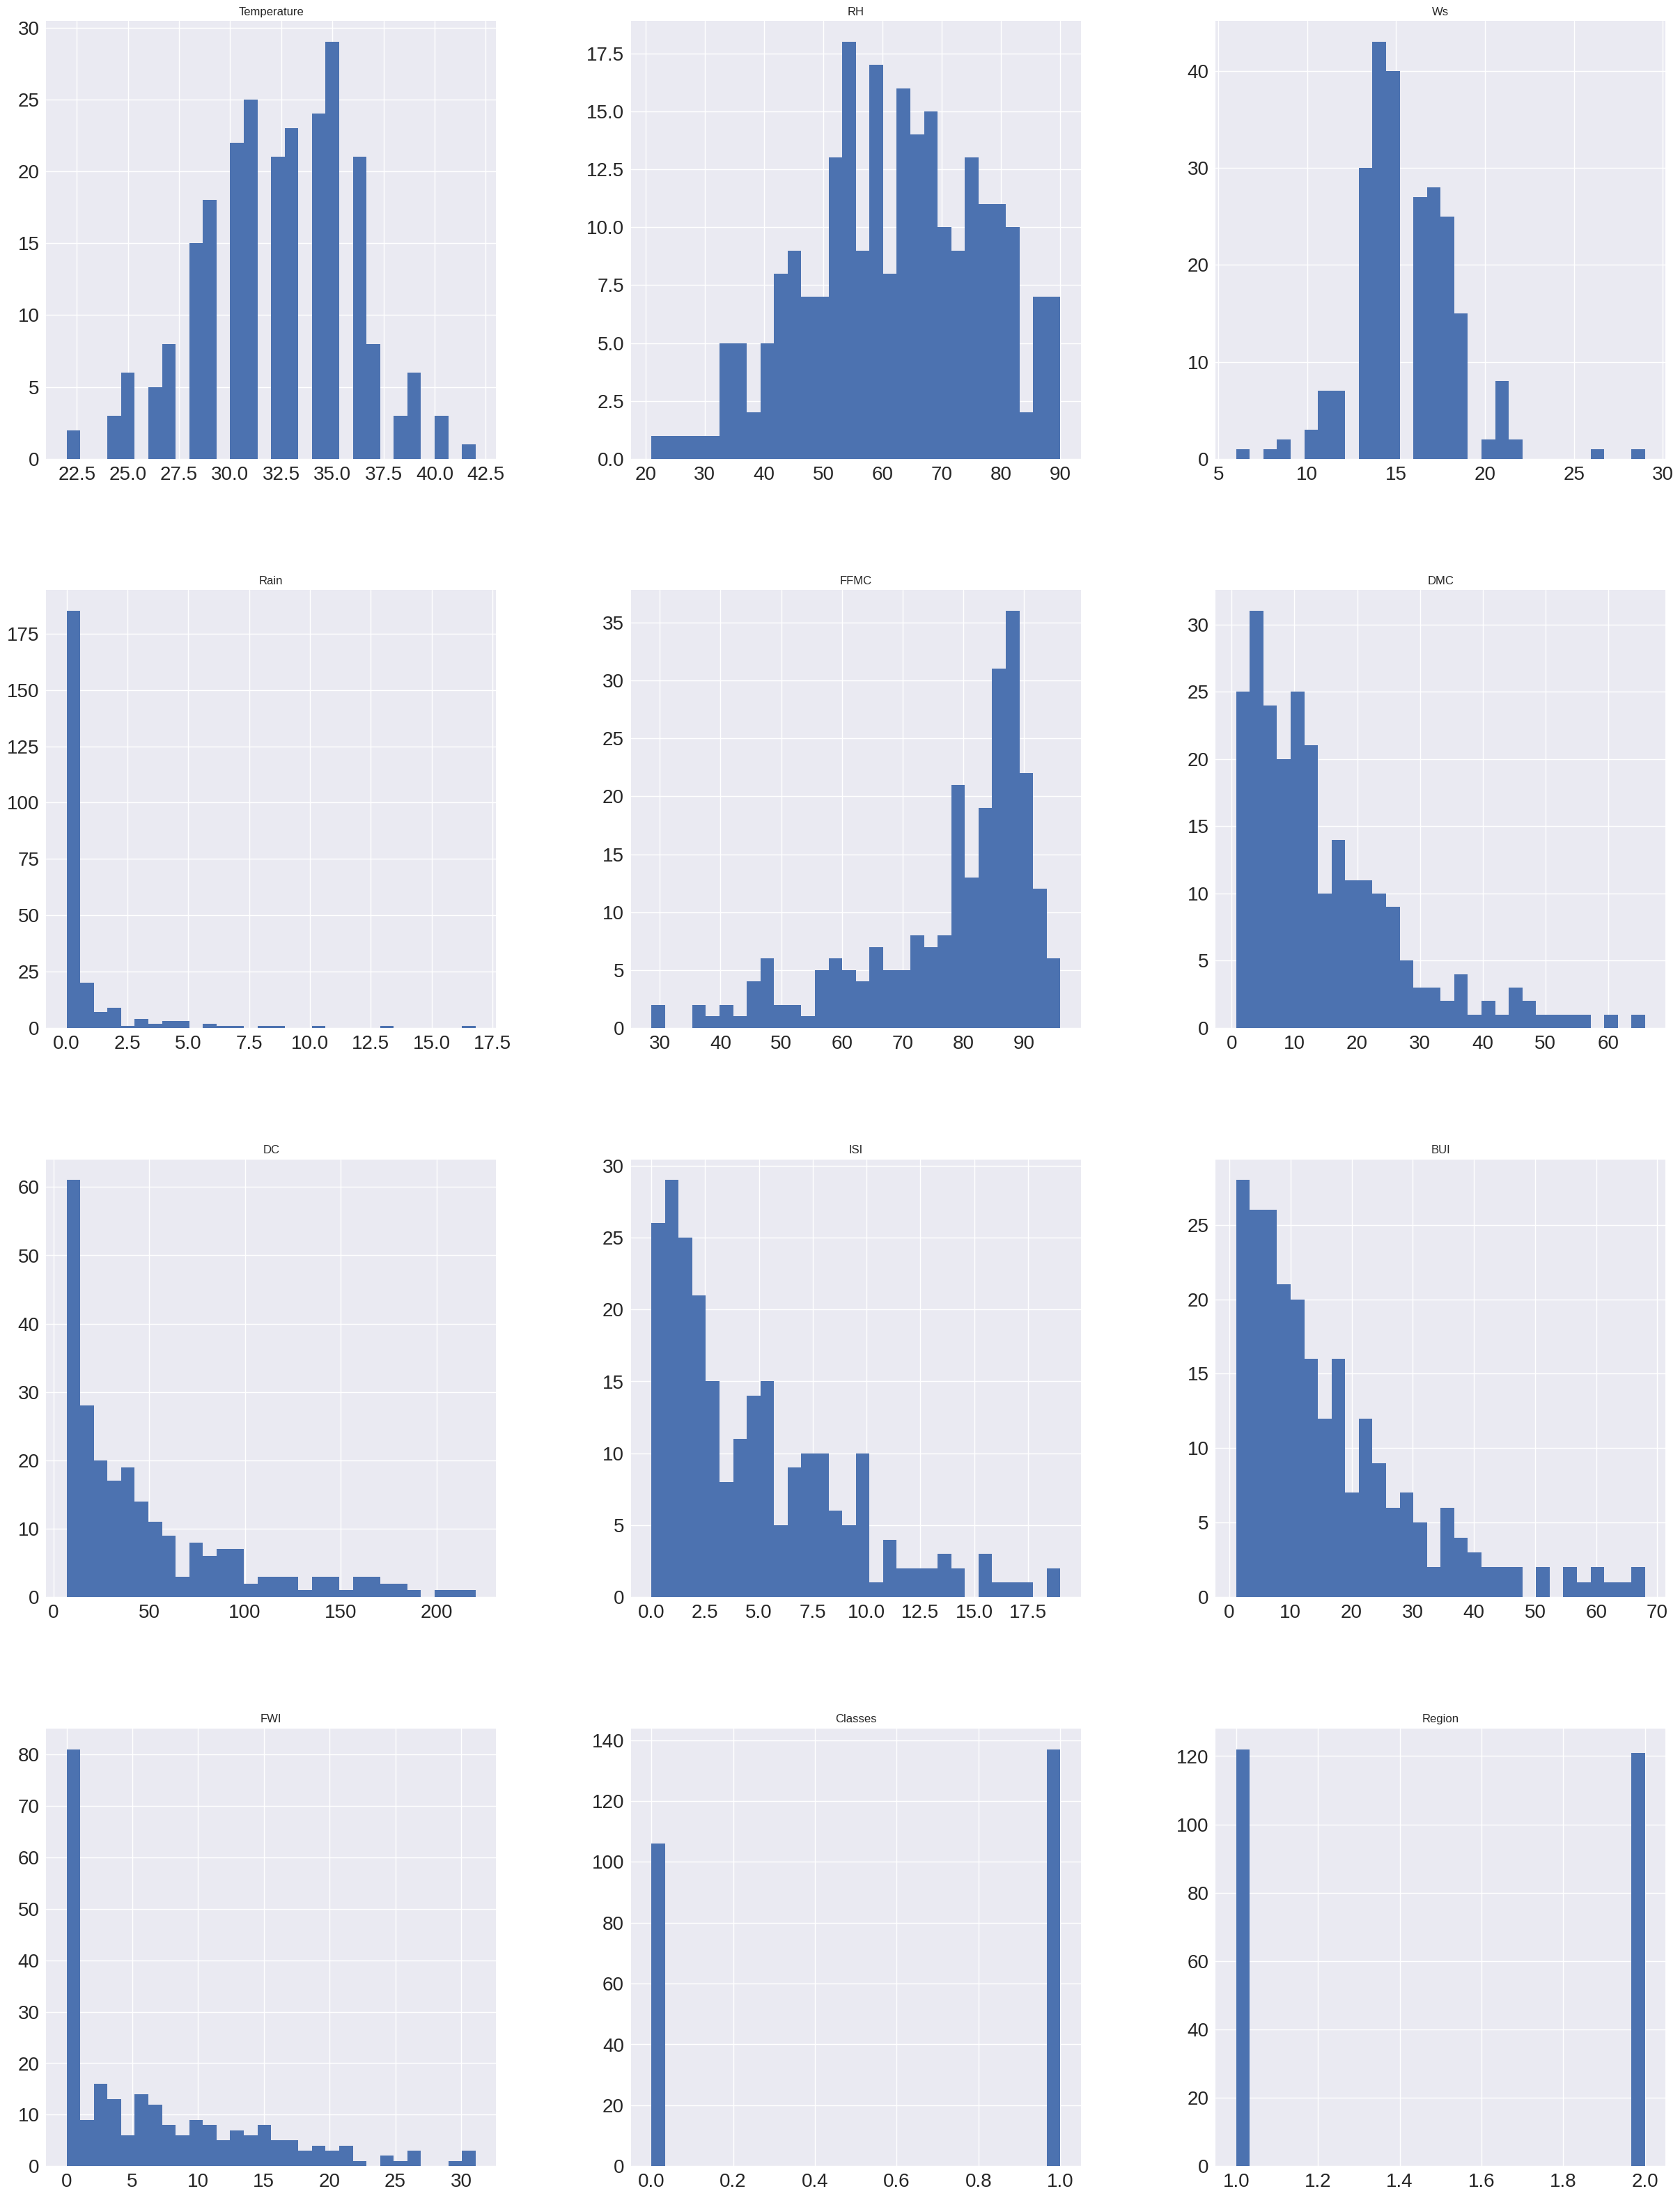

In [37]:
plt.style.use("seaborn")
df.hist(bins = 30, figsize = (30, 40), xlabelsize = 20, ylabelsize = 20)
plt.show()

In [38]:
percentage = df.Classes.value_counts(normalize = True) * 100

In [39]:
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

In [40]:
class_labels = ["FIRE", "NOT FIRE"]

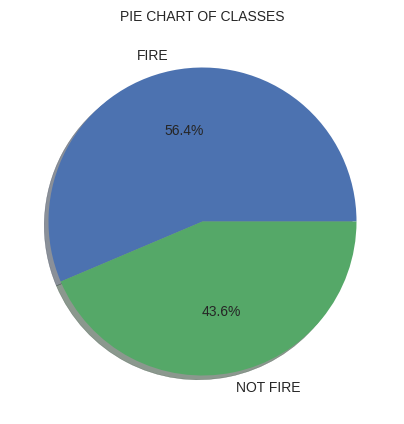

In [41]:
plt.figure(figsize = (5,5))
plt.pie(percentage, labels = class_labels, autopct = '%1.1f%%', shadow = True)
plt.title("PIE CHART OF CLASSES", fontsize = 10)
plt.show()

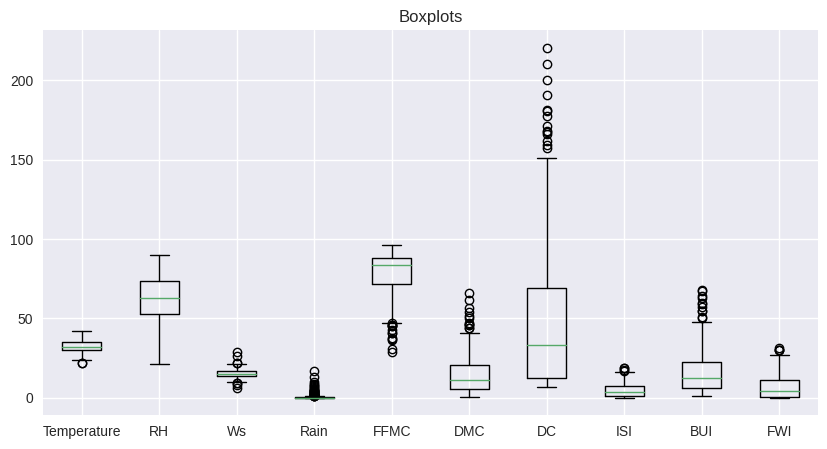

In [52]:
dftemp = df.drop(["Classes", "Region"], axis = 1)
plt.figure(figsize = (10, 5))
plt.boxplot(dftemp)
plt.title("Boxplots")
x_labels = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
plt.xticks(ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels = x_labels)
plt.show()

<AxesSubplot: xlabel='FWI'>

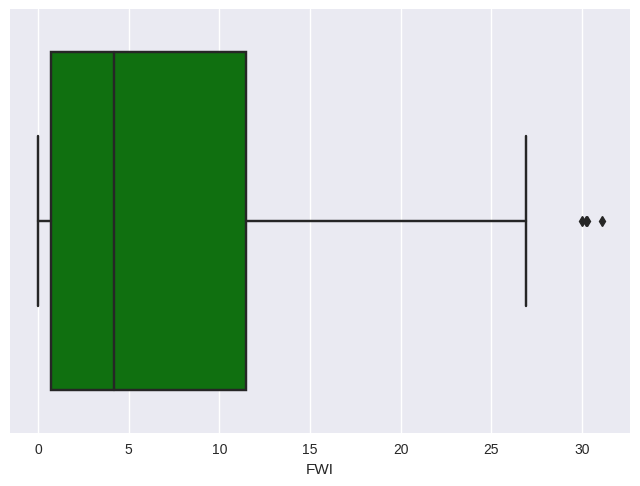

In [87]:
sns.boxplot(x = df["FWI"], color = "green")

<AxesSubplot: xlabel='FFMC'>

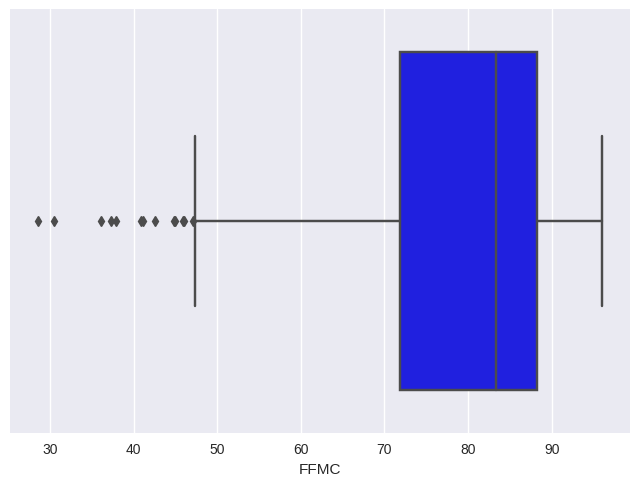

In [88]:
sns.boxplot(x = df["FFMC"], color = "blue")

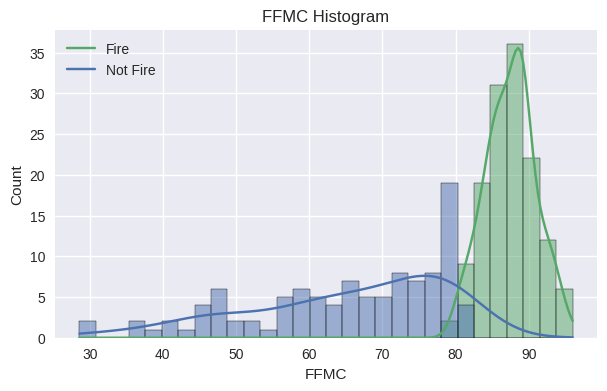

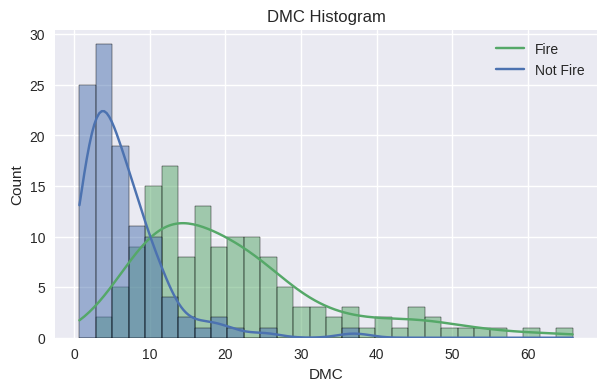

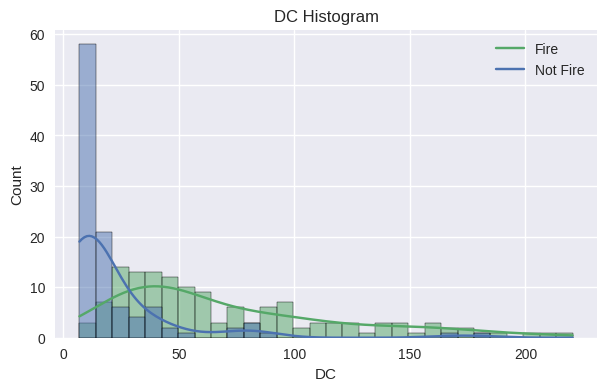

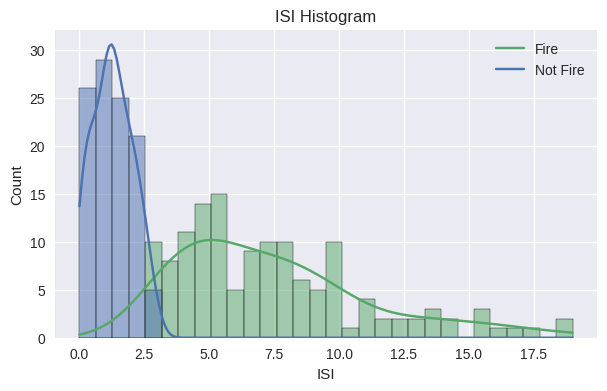

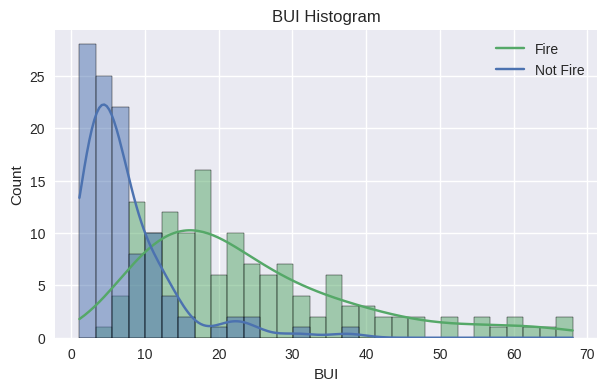

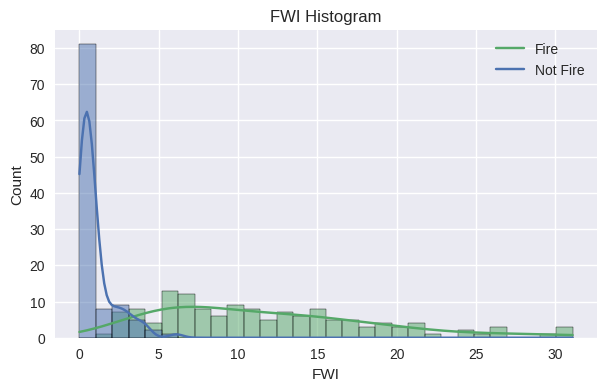

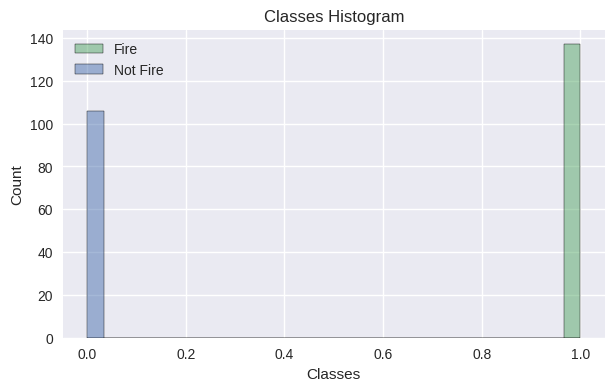

In [58]:
dftemp = df.drop(["Region", "Temperature", "Ws", "RH", "Rain"], axis = 1)
for feature in dftemp:
    plt.figure(figsize = (7,4))
    sns.histplot(x = feature, data = dftemp, kde = True, bins = 30, hue = "Classes")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(labels = ["Fire", "Not Fire"])
    plt.title(str(feature) + " Histogram")
    plt.show()

In [68]:
by_feature =  df.groupby(["Temperature"], as_index = False)['Classes'].sum()

In [69]:
by_feature

,Temperature,Classes
0,22,0
1,24,0
2,25,0
3,26,1
4,27,1
5,28,3
6,29,5
7,30,7
8,31,16
9,32,12


In [80]:
def bar_chart(feature, xlabel) :
    plt.figure(figsize = (15, 6))
    by_feature = df.groupby([feature], as_index = False)["Classes"].sum()
    sns.barplot(data = by_feature, x = feature, y = "Classes")
    plt.xlabel(xlabel)
    plt.ylabel("Fire Count")
    plt.title(str(feature) + " v/s Fire Count")
    plt.show()

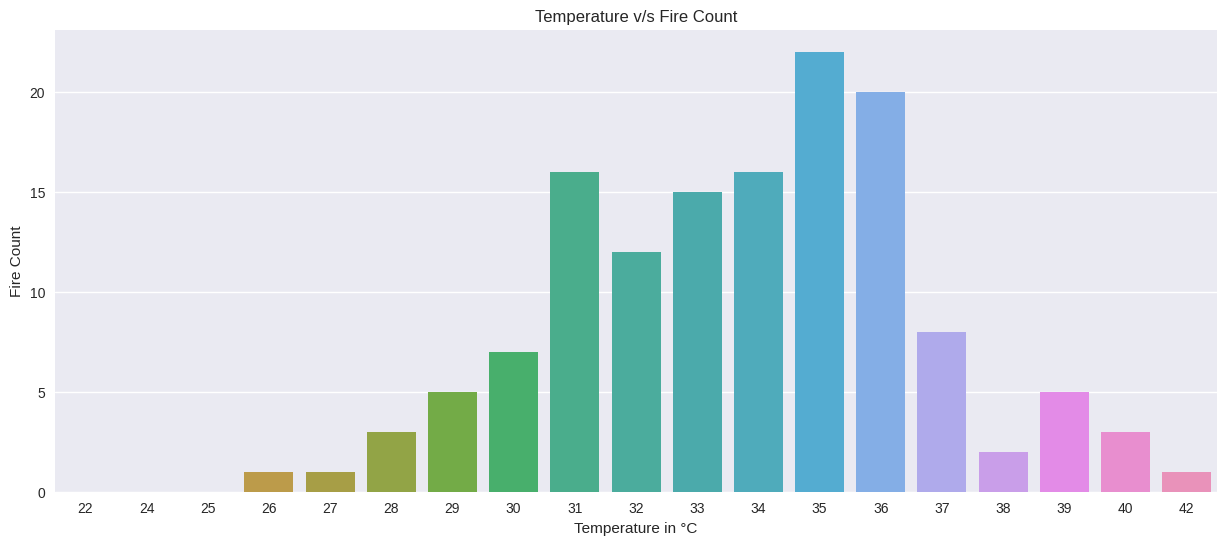

In [81]:
bar_chart("Temperature", "Temperature in °C")

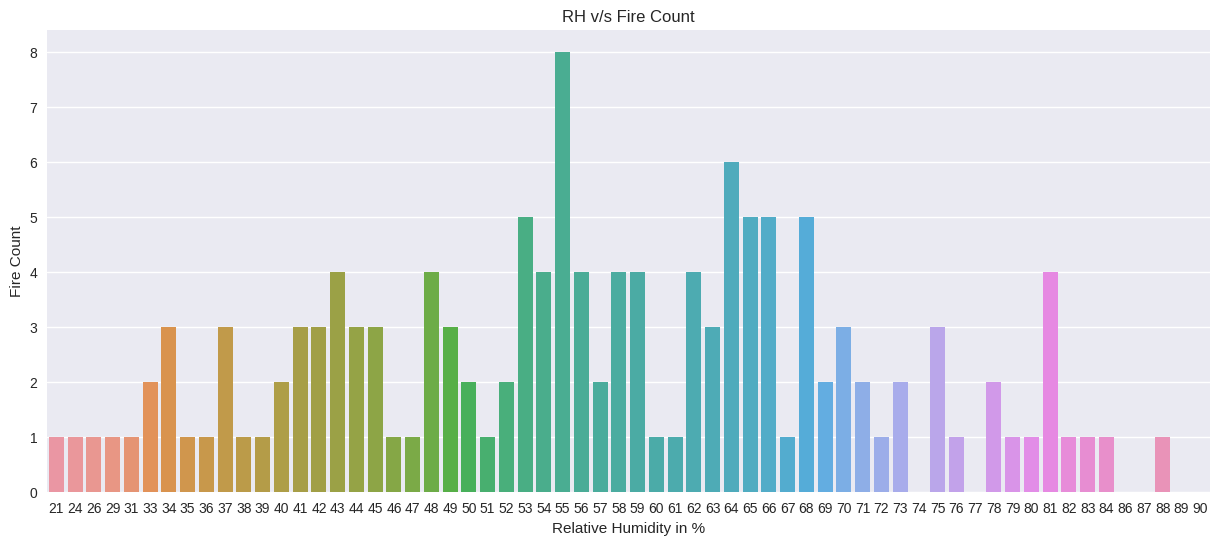

In [82]:
bar_chart("RH", "Relative Humidity in %")

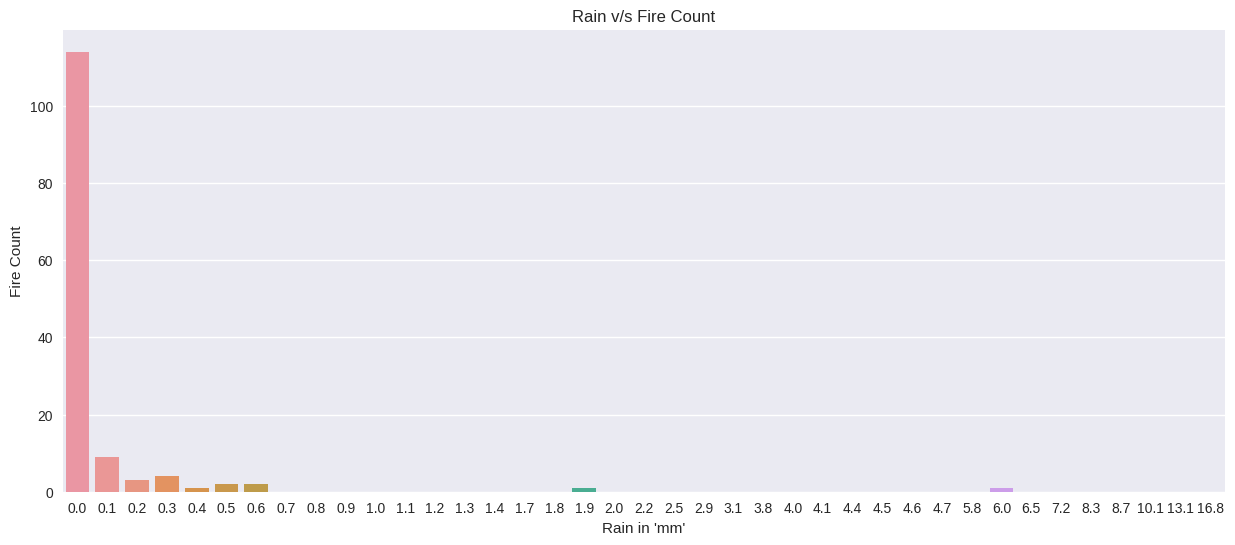

In [83]:
bar_chart("Rain", "Rain in 'mm'")

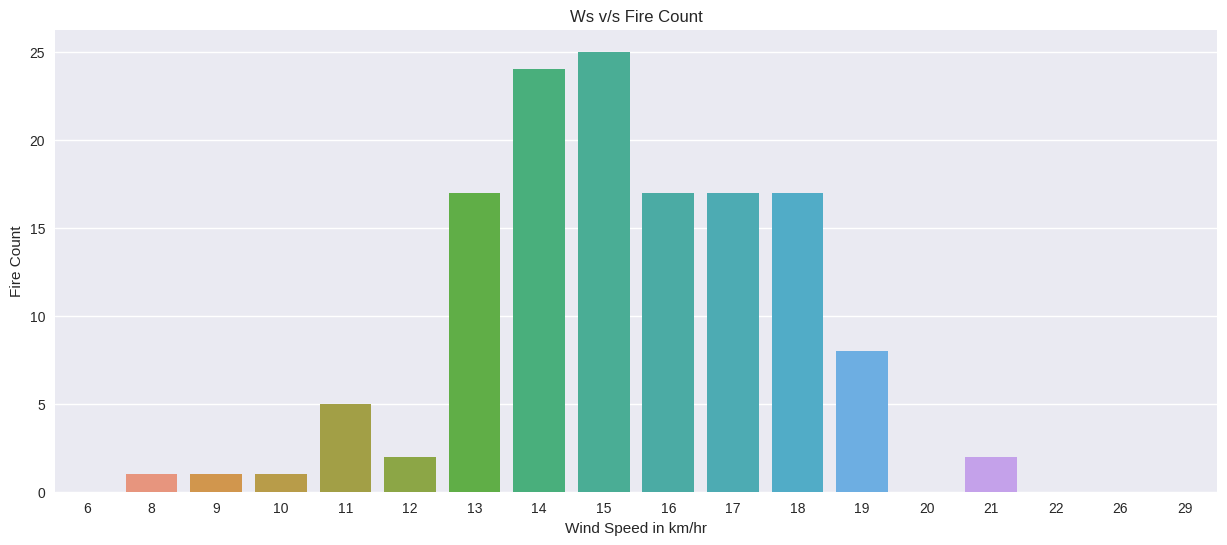

In [84]:
bar_chart("Ws", "Wind Speed in km/hr")